In [63]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ot
import numpy.random as random

In [64]:
def sdf_circle(x, r=0.5):
    return np.sqrt(np.sum(x**2, axis=1)) - r

In [65]:
def sdf_box(x, b=[1.0,1.0]):
    d = np.abs(x)-b
    max_d = np.maximum(d, 0.0)
    length_d = np.sqrt(np.sum(max_d**2, 1))
    return length_d + np.minimum(np.maximum(d[:,0], d[:,1]), 0.0)

In [66]:
def sample_grid(resolution, low=-1.0, high=1.0):
    idx = np.linspace(low, high, num=resolution)
    x, y = np.meshgrid(idx, idx)
    V = np.concatenate((x.reshape((-1,1)), y.reshape((-1,1))), 1)

    return V

In [67]:
def linear_morphing(f1, f2, t, x):
    return (1-t)*f1(x) + t*f2(x)

MovieWriter imagemagick unavailable; using Pillow instead.


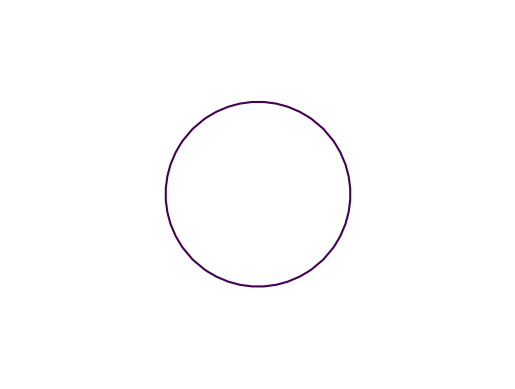

In [68]:
grid_size = 32

fig = plt.figure()
x = sample_grid(grid_size)

def animate(t):
    plt.cla()
    f1=sdf_circle
    f2=sdf_box
    out = linear_morphing(f1, f2,np.array([t]), x)
    #levels = np.linspace(-1.0, 1.0, 21)
    #im = plt.contourf(out.reshape(grid_size, grid_size), levels = levels)
    im = plt.contour(out.reshape(grid_size, grid_size), levels = [0.0])
    plt.axis('equal')
    plt.axis("off")
    return im


anim = animation.FuncAnimation(fig, animate, frames=np.linspace(0, 1, 50), interval=50)
anim.save("output.gif", writer="imagemagick")

In [69]:
f1=sdf_circle
f2=sdf_box

nb_images = 5
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))

fig, axes = plt.subplots(nb_images, nb_images, figsize=(7, 7))

# regularization parameter
reg = 0.004
for i in range(nb_images):
    for j in range(nb_images):
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            axes[i, j].imshow(f1, cmap=cm)
        elif i == 0 and j == (nb_images - 1):
            axes[i, j].imshow(f3, cmap=cm)
        elif i == (nb_images - 1) and j == 0:
            axes[i, j].imshow(f2, cmap=cm)
        elif i == (nb_images - 1) and j == (nb_images - 1):
            axes[i, j].imshow(f4, cmap=cm)
        else:
            # call to barycenter computation
            axes[i, j].imshow(
                ot.bregman.convolutional_barycenter2d(A, reg, weights),
                cmap=cm
            )
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

NameError: name 'nb_images' is not defined